In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fig 2k,l

In [2]:
project_name = 'DataSet/sc/'

In [3]:
# Visualization
# Load results from dist
# lr_count, position: merged data with positions contains column (x) and row (y) index.
# original_count, en_position: enhanced data with positions contains column (en_x) and row (en_y) index.
# hr_count: soScope data.
lr_count = np.load(f'{project_name}/label.npy')
position = pd.read_csv(f'{project_name}/colData_merge.csv')
row = position['y'].tolist()
col = position['x'].tolist()

hr_count = np.load(f'{project_name}/infer_subspot.npy')
en_position = pd.read_csv(f'{project_name}/reordered_position_with_center.csv')
en_row = en_position['imagerow'].tolist()
en_col = en_position['imagecol'].tolist()

original_count_df = pd.read_csv(f'{project_name}/reordered_count.csv', index_col=0)
lr_count_df = pd.read_csv(f'{project_name}/count_merge.csv', index_col=0)
original_count = original_count_df.values
gene_name = original_count_df.keys().tolist()

In [4]:
original_count.shape

(1538, 10)

In [5]:
gene_name = original_count_df.keys().tolist()
data_ours = pd.DataFrame(hr_count, columns=gene_name)
data_ours.to_csv(f'{project_name}/data_ours.csv')

In [6]:
data_ours

,Stmn1,Epcam,Sostdc1,C3,Kcnj16,Lrp2,Plvap,Upk1b,Cubn,Kcnj1
0,3.989831,0.845325,0.235032,0.119134,0.155857,0.084509,0.822872,0.001762,0.010352,0.053019
1,7.332049,0.319071,0.213426,0.201489,0.061794,0.093512,2.567291,0.002442,0.007676,0.036138
2,7.122530,0.196430,0.042111,0.158515,0.049614,0.053598,2.138277,0.004914,0.007142,0.012646
3,3.399691,3.274430,0.432506,0.098497,0.619536,0.037052,0.598553,0.000904,0.003665,0.198941
4,3.054973,2.695777,0.382867,0.138549,0.458273,0.074879,0.693728,0.002640,0.009218,0.170490
...,...,...,...,...,...,...,...,...,...,...
1533,0.695933,0.013787,0.074174,58.637638,0.050373,0.170407,0.034919,0.023394,0.003067,0.024599
1534,3.149665,0.007021,0.016455,12.435555,0.010980,0.096565,0.216648,0.031137,0.002818,0.003254
1535,2.685572,0.001713,0.005159,26.084162,0.006716,0.027221,0.110301,0.096264,0.000626,0.002417
1536,2.725993,0.006881,0.020588,23.204268,0.017486,0.092519,0.161844,0.018742,0.001456,0.004993


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

data = []
for g in gene_name:
    pearson_r, _ = pearsonr(original_count_df[g], data_ours[g])
    data.append(pearson_r)

In [8]:
hr_c_count = pd.read_csv(f'{project_name}/istar.csv')

In [13]:
data_ = []
for g in gene_name:
    pearson_r, _ = pearsonr(original_count_df[g], hr_c_count[g])
    data_.append(pearson_r)

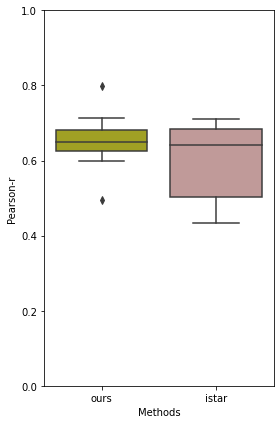

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pear_df = pd.DataFrame({'Pearson-r':data+data_, 
                      'Methods':['ours']*len(data)+['istar']*len(data)})
color_list = [[180, 180, 16], [198, 148, 146], [219,189,188], 
              [194, 131, 105], [96, 154, 116], [201, 200, 103], 
              [126, 120, 164], [138, 120, 109],[120, 120, 182], [194, 139, 182]]
color_x = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list]

plt.figure(figsize=(4, 6))
sns.boxplot(x='Methods', y='Pearson-r', data=pear_df, palette=color_x)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(f'{project_name}/sc_pearson.pdf', pad_inches=0)
plt.show()

In [15]:
def norm(array):
    return (array - np.min(array))/(np.max(array) - np.min(array))

from sklearn.metrics import mean_squared_error as mse
data_mse = []
for idx in range(original_count.shape[1]):
    mse_value = mse(norm(original_count[:, idx]), norm(hr_count[:, idx]))
    data_mse.append(mse_value)

data_mse_ = []
for g in original_count_df.keys():
    mse_value = mse(norm(original_count_df[g]), norm(hr_c_count[g]))
    data_mse_.append(mse_value)
    

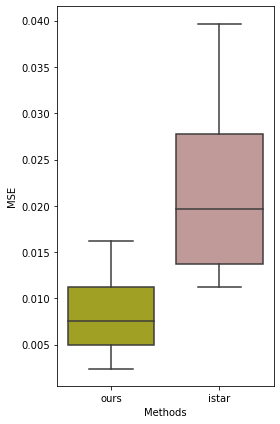

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mse_df = pd.DataFrame({'MSE':data_mse+data_mse_, 
                      'Methods':['ours']*len(data)+['istar']*len(data)})

color_list = [[180, 180, 16], [198, 148, 146], [219,189,188], 
              [194, 131, 105], [96, 154, 116], [201, 200, 103], 
              [126, 120, 164], [138, 120, 109],[120, 120, 182], [194, 139, 182]]
color_x = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list]

plt.figure(figsize=(4, 6))
sns.boxplot(x='Methods', y='MSE', data=mse_df, palette=color_x)

plt.tight_layout()
plt.savefig(f'{project_name}/sc_mse.pdf', pad_inches=0)
plt.show()

# Supp Fig 3e

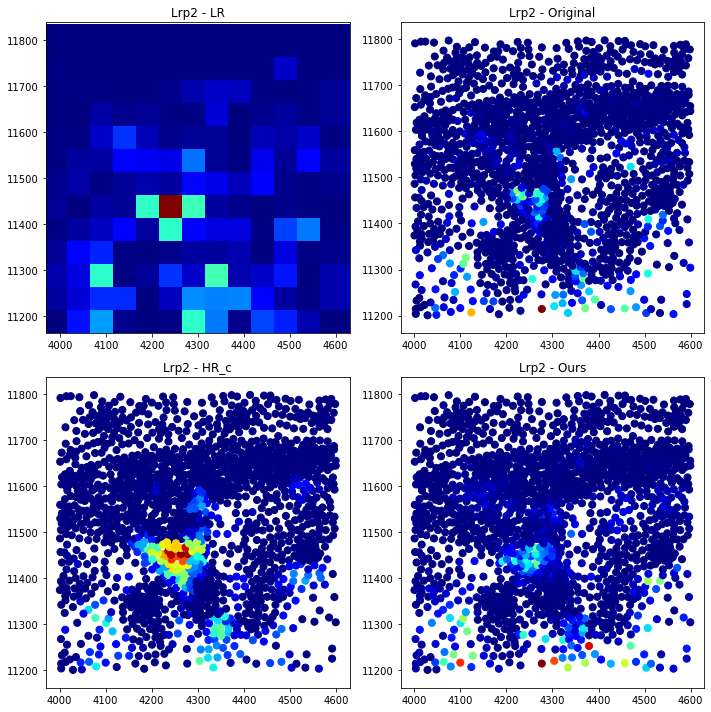

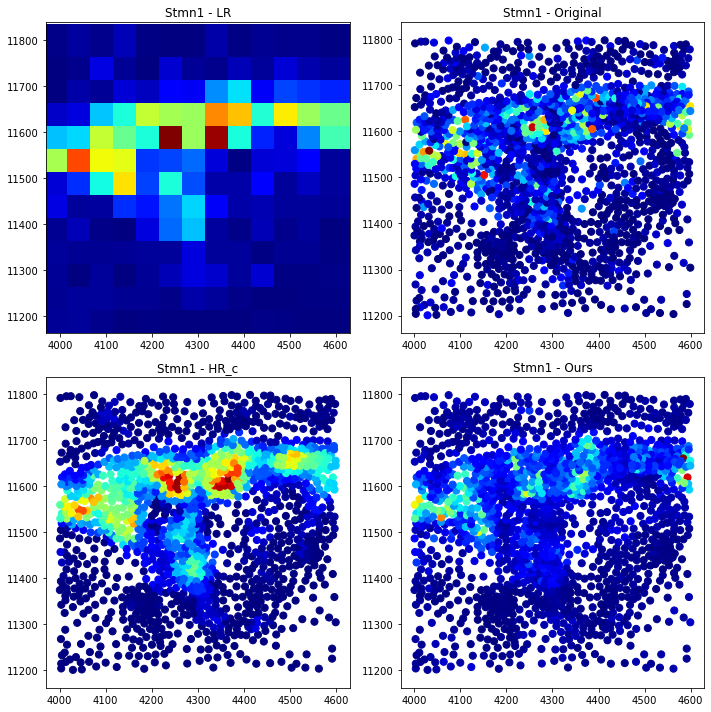

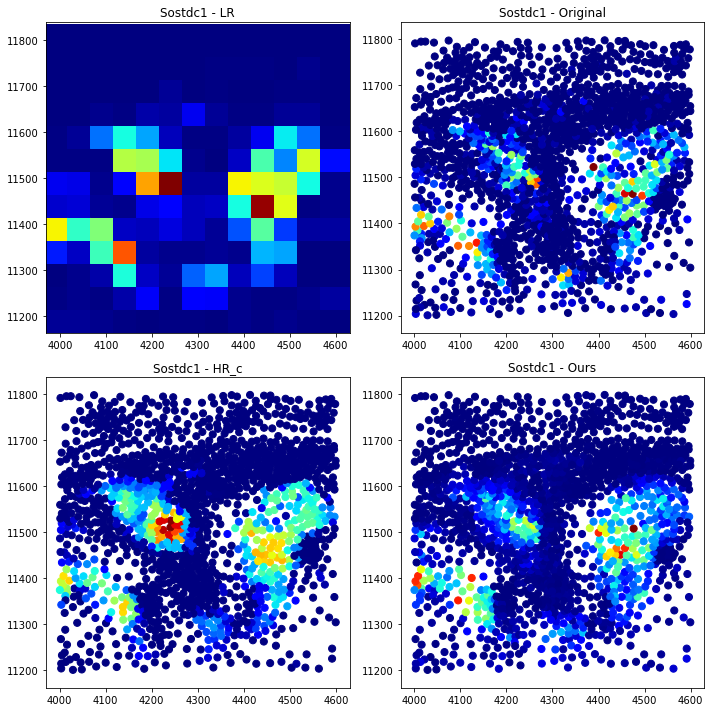

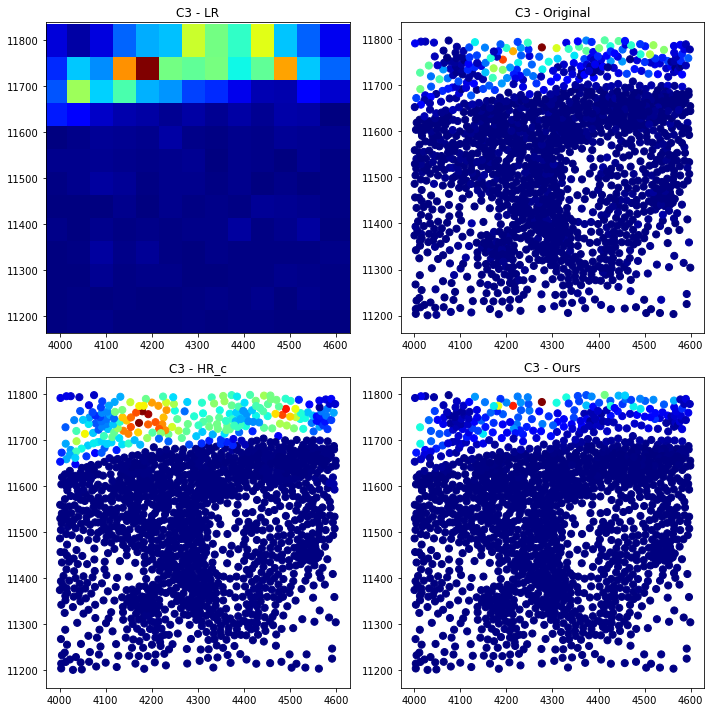

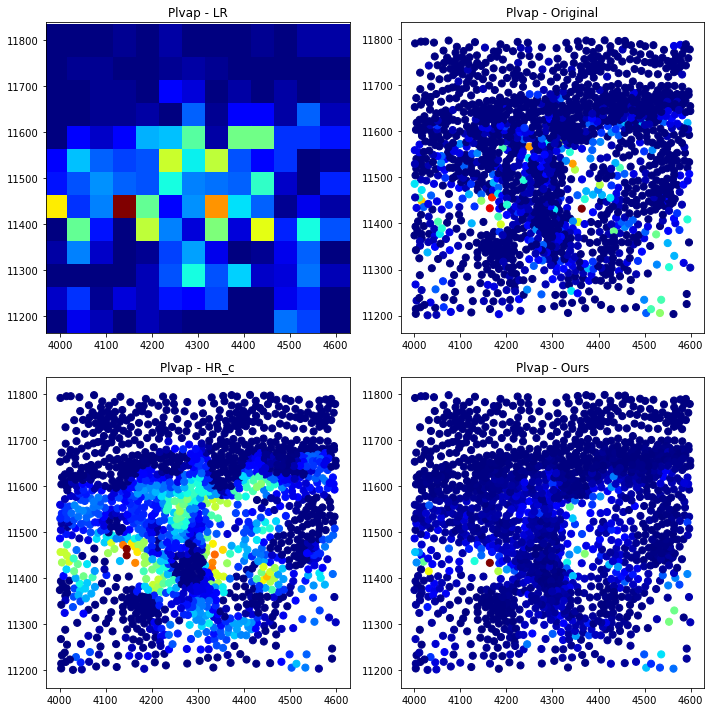

In [17]:
import matplotlib.pyplot as plt
import numpy as np

cmp = 'jet'
for g in ['Lrp2', 'Stmn1', 'Sostdc1', 'C3', 'Plvap']:
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()
    c_l = lr_count_df[g]
    axs[0].scatter(np.array(col), np.array(row), s=1000, marker='s', c=c_l, cmap=cmp)
    axs[0].set_title(f'{g} - LR')

    coriginal = original_count_df[g]
    axs[1].scatter(en_col, en_row, s=50, marker='o', c=coriginal, cmap=cmp, vmin=0)
    axs[1].set_title(f'{g} - Original')

    ci = hr_c_count[g]
    axs[2].scatter(np.array(en_col), np.array(en_row), s=50, marker='o', c=ci, cmap=cmp)
    axs[2].set_title(f'{g} - HR_c')

    c = data_ours[g]
    axs[3].scatter(np.array(en_col), np.array(en_row), s=50, marker='o', c=c, cmap=cmp)
    axs[3].set_title(f'{g} - Ours')

    for ax in axs:
        ax.axis('equal') 
    plt.tight_layout()
    plt.show()
